**Ojetivos**

- aprender a selecionar linhas
- aprender a dar merge em colunas
- aprender a fazer medidas de tendência central e de dispersão
- aprender a lidar com diferentes tipos de variáveis
- aprender a mexer com pacote Pandas

**Perguntas para serem respondidas com visualização de dados:**
- qual é a média de tamanho das pétalas?E das sépalas?
- qual é o tamanho da menor e maior pétala e sépala?
- existe alguma relação entre o tamanho das pétalas e das sépalas?
- qual espécie tem maior pétala?e sépala?
- qual espécie tem menor pétala?e sépala?
- nas flores, as sepálas são menores ou maiores que as pétalas?
- como os dados de cada atributo estão distribuídos?

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#importar pandas e seabord
import pandas as pd
import pandas_profiling
import seaborn as sns

In [ ]:
#importar banco de dados iris do seaborn
iris = sns.load_dataset('iris')
type(iris)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Explorando os dados**

In [ ]:
#qual tamanho? 150l e 5c
iris.info

In [ ]:
#quais atributos das espécies?
#tamanho (largura e altura) de sépalas e pétalas
iris.columns

In [ ]:
#quais espécies?
iris.species.unique() #setosa, versicolor, virginica

In [ ]:
#medidas descritivas das variáveis numéricas
iris.describe()

In [ ]:
#existem dados faltantes no conjunto? não
print(iris.isnull().sum())

In [ ]:
# média de tamanho das pétalas
iris.petal_length.mean() #3.75
iris.petal_width.mean() #1.19

In [ ]:
# média de tamanho das sépalas
iris.sepal_length.mean() #5.84
iris.sepal_width.mean() #3.05

#sépalas são maiores do que pétalas em h e w, na média

In [ ]:
#criar nova coluna com a unidade de medida (cm)
iris['unity'] = 'cm'
iris

In [ ]:
#profile dos dados
profile = pandas_profiling.ProfileReport(iris)
profile.to_file("/content/drive/MyDrive/Colab Notebooks/HandsOn/report_pratica1.html")

In [ ]:
profile

**Visualização de dados**

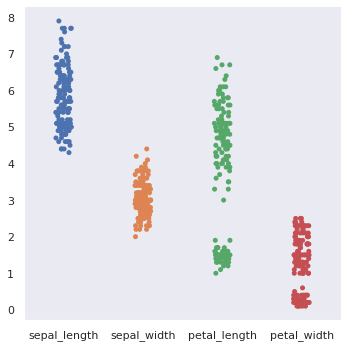

In [ ]:
#como os dados de cada atributo estão distribuídos?
sns.catplot(data=iris)

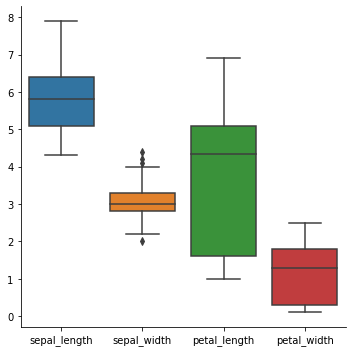

In [ ]:
sns.catplot(data=iris, kind='box')

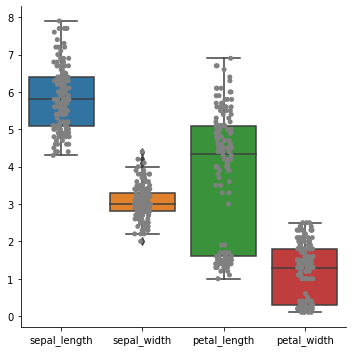

In [ ]:
#gráfico composto
sns.catplot(data=iris, kind='box')
sns.stripplot(data=iris, color='gray');

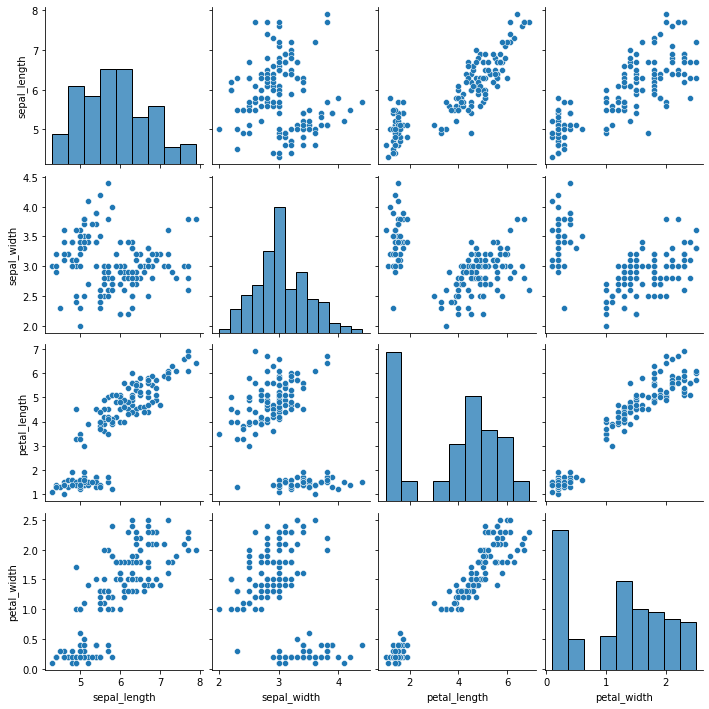

In [ ]:
#explorando as relações
sns.pairplot(iris)

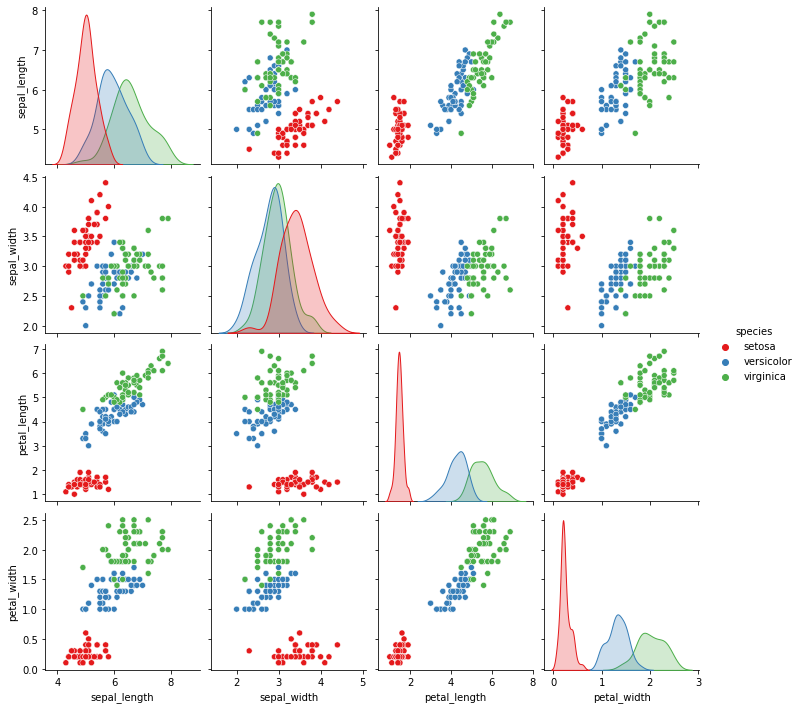

In [ ]:
#explorando relações por espécie
sns.pairplot(iris, hue="species", palette="Set1");

In [ ]:
# qual é a média de tamanho das pétalas e sépalas total e por espécie?
#faltou total

In [ ]:
#por espécie
#qual figura?
table = iris.groupby('species').mean()
columnNames = {'sepal_length': 'sepala_comp', 'sepal_width': 'sepala_larg', 'petal_width': 'petala_larg', 'petal_length': 'petala_comp'}
table.rename(columns=columnNames, inplace = True)
table

,sepala_comp,sepala_larg,petala_comp,petala_larg
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


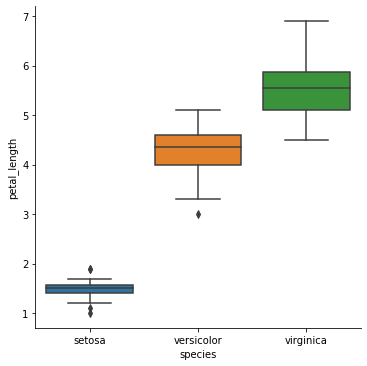

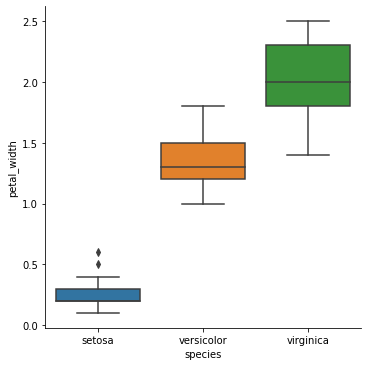

In [ ]:
#como agrupar os graficos das 4 variáveis?
#o ideal era esse grafico: # o ideal seria esse gráfico: https://seaborn.pydata.org/examples/jitter_stripplot.html
sns.catplot(x="species", y="petal_length", kind='box', data=iris)
sns.catplot(x="species", y="petal_width", kind='box', data=iris)

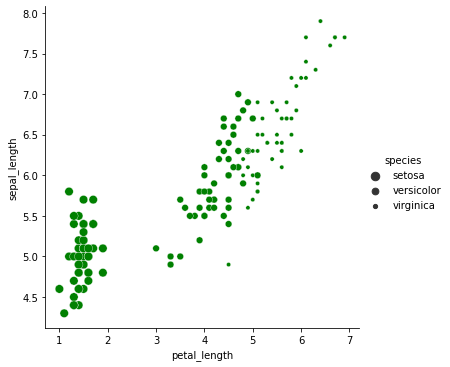

In [ ]:
#relação entre tamanho da pétala e da sépala total
sns.relplot(x="petal_length", y="sepal_length", size="species", data=iris, color='g')

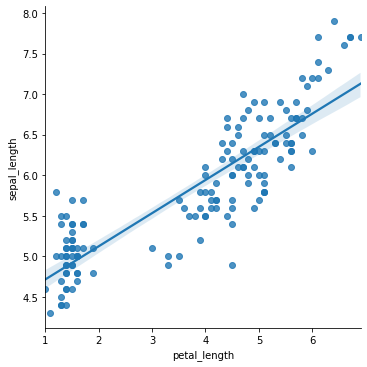

In [ ]:
sns.lmplot(x="petal_length", y="sepal_length", data=iris)

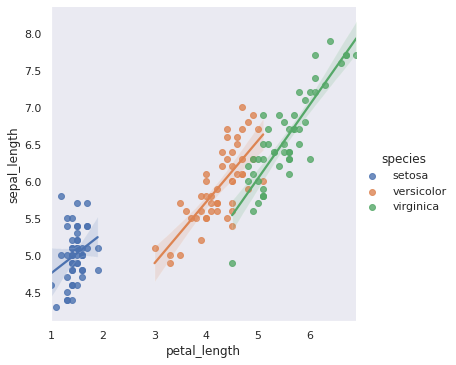

In [ ]:
#relação por espécie
sns.lmplot(x="petal_length", y="sepal_length", hue='species', data=iris)